In [1]:
# Candice Huo 1005708370
# Instructor: Professor Shion Guha
# Course code: INF2178
# Course name: Experimental Design for Data Science
# Program: MI
# Faculty of Information
# University of Toronto

# Technical Assignment 4

In [2]:
!pip install pingouin
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import mixedlm
from statsmodels.stats.power import TTestIndPower
import pingouin as pg
import seaborn as sns
from google.colab import drive
drive.mount('/drive', force_remount=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.8 MB/s eta 0:00:00
Mounted at /drive


In [3]:
df = pd.read_csv("/content/INF2178_A4_data .csv")
df = df.drop(['Hand', 'Unnamed: 0', 'MRI ID', 'MR Delay'], axis=1)
df['Visit'] = df['Visit'].apply(lambda x: 'first' if x==1 else 'second')

counts = df['Subject ID'].value_counts()
single_value_rows = df.loc[df['Subject ID'].isin(counts[counts == 1].index)]
df = df.drop(single_value_rows.index)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 293
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  288 non-null    object 
 1   Group       288 non-null    object 
 2   Visit       288 non-null    object 
 3   M/F         288 non-null    object 
 4   Age         288 non-null    int64  
 5   EDUC        288 non-null    int64  
 6   SES         274 non-null    float64
 7   MMSE        287 non-null    float64
 8   CDR         288 non-null    float64
 9   eTIV        288 non-null    int64  
 10  nWBV        288 non-null    float64
 11  ASF         288 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 29.2+ KB


In [4]:
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,288.000000,288.000000,274.000000,287.000000,288.000000,288.000000,288.000000,288.000000
mean,76.423611,14.590278,2.489051,27.219512,0.303819,1479.065972,0.731247,1.203062
std,7.628646,2.899990,1.129795,3.436319,0.383300,177.129077,0.037491,0.139995
min,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,71.000000,12.000000,2.000000,26.000000,0.000000,1344.750000,0.703000,1.118000
50%,76.000000,15.000000,2.000000,29.000000,0.000000,1462.500000,0.732000,1.200000
75%,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.305000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


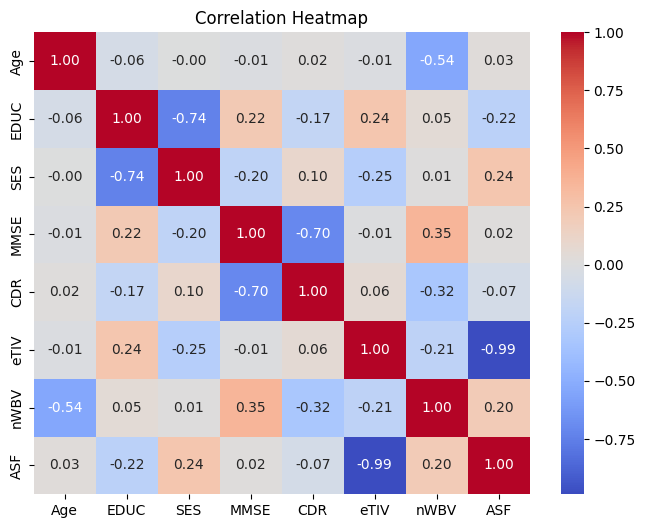

In [5]:
selected_columns = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
correlation_data = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

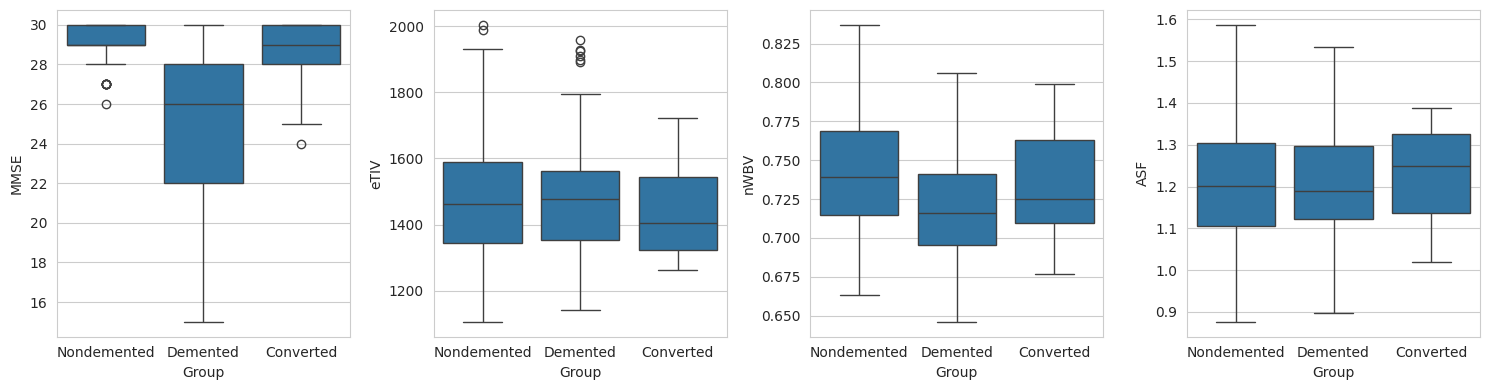

In [6]:
# Set Drawing Style
sns.set_style("whitegrid")

# Plot box plot
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

sns.boxplot(x='Group', y='MMSE', data=df, ax=axes[0])
sns.boxplot(x='Group', y='eTIV', data=df, ax=axes[1])
sns.boxplot(x='Group', y='nWBV', data=df, ax=axes[2])
sns.boxplot(x='Group', y='ASF', data=df, ax=axes[3])

plt.tight_layout()
plt.show()

In [8]:
# Iterate over each column in the DataFrame.
for column in df.columns:
# Print the column name along with the number of unique values it contains.
    print(column + " has " + str(df[column].nunique()))

Subject ID has 144
Group has 3
Visit has 2
M/F has 2
Age has 38
EDUC has 12
SES has 5
MMSE has 16
CDR has 4
eTIV has 235
nWBV has 127
ASF has 227


In [9]:
# Group by Subject ID and check for any inconsistencies in the Group values within each group.
inconsistent_ids = []
for subject_id, group_df in df.groupby('Subject ID'):
    unique_groups = group_df['Group'].unique()
    if len(unique_groups) > 1:
        inconsistent_ids.append(subject_id)

# Output the Subject IDs where inconsistencies in Group values exist.
if len(inconsistent_ids) > 0:
    print("exist different result of Subject ID")
    print(inconsistent_ids)
else:
    print("not exist different result of Subject ID。")

not exist different result of Subject ID。


In [10]:
# Define parameters
effect_size = 0.7  # Effect size
alpha = 0.05  # Significance level
power = 0.91  # Statistical power
ratio = 1.0  # Ratio of sample size in the second group to the first group

# Create a power analysis object
power_analysis = TTestIndPower()

# Calculate sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

print(f"Sample size/Number needed in each group: {sample_size}")

Sample size/Number needed in each group：45.45073088568012


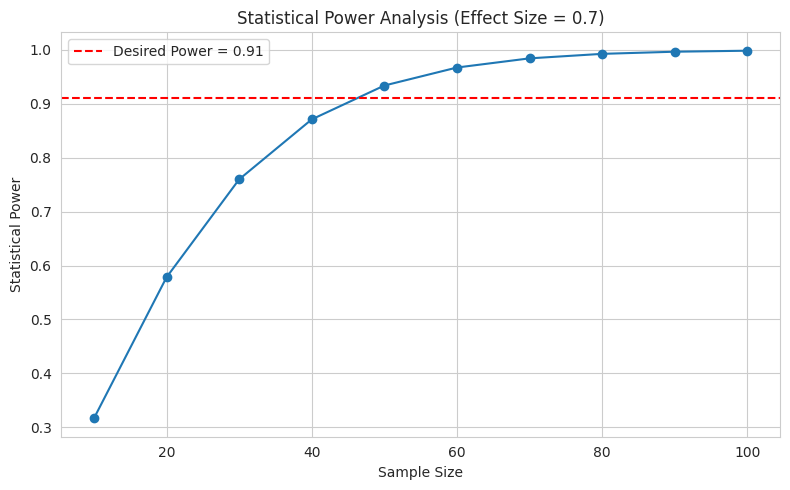

In [11]:
# Define parameter ranges
sample_sizes = np.arange(10, 101, 10)  # Range of sample sizes
effect_size = 0.7  # Fixed effect size
alpha = 0.05  # Significance level

# Create a power analysis object
power_analysis = TTestIndPower()

# Calculate statistical power
powers = []
for sample_size in sample_sizes:
    power = power_analysis.solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha)
    powers.append(power)

# Plot the statistical power analysis
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, powers, marker='o')
plt.axhline(y=0.91, color='r', linestyle='--', label='Desired Power = 0.91')  # Add the desired statistical power line
plt.xlabel('Sample Size')
plt.ylabel('Statistical Power')
plt.title('Statistical Power Analysis (Effect Size = 0.7)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
df.groupby(['Visit', 'Group'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Visit  Group                   
first  Converted    29.33  0.98
       Demented     25.23  3.32
       Nondemented  29.19  0.86
second Converted    28.00  2.09
       Demented     24.25  4.40
       Nondemented  29.11  0.96

In [13]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)
posthocs = pg.pairwise_tests(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=df)
#pg.print_table(posthocs)


ANOVA SUMMARY

Source              SS    DF1    DF2         MS      F    p-unc    np2      eps
-----------  ---------  -----  -----  ---------  -----  -------  -----  -------
Group        37424.708      2    141  18712.354  0.297    0.743  0.004  nan
Visit         5573.920      1    141   5573.920  9.225    0.003  0.061    1.000
Interaction   1004.783      2    141    502.392  0.831    0.438  0.012  nan



In [14]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)
posthocs = pg.pairwise_tests(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)
#pg.print_table(posthocs)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



In [15]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='ASF', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)
posthocs = pg.pairwise_tests(dv='ASF', within='Visit', between='Group', subject='Subject ID', data=df)
#pg.print_table(posthocs)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        0.018      2    141  0.009  0.234    0.792  0.003  nan
Visit        0.003      1    141  0.003  8.754    0.004  0.058    1.000
Interaction  0.001      2    141  0.000  1.028    0.361  0.014  nan



<ipython-input-16-309cf8047622>:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='eTIV', hue='Group', dodge=True,
<ipython-input-16-309cf8047622>:10: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='nWBV', hue='Group', dodge=True,
<ipython-input-16-309cf8047622>:15: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='ASF', hue='Group', dodge=True,


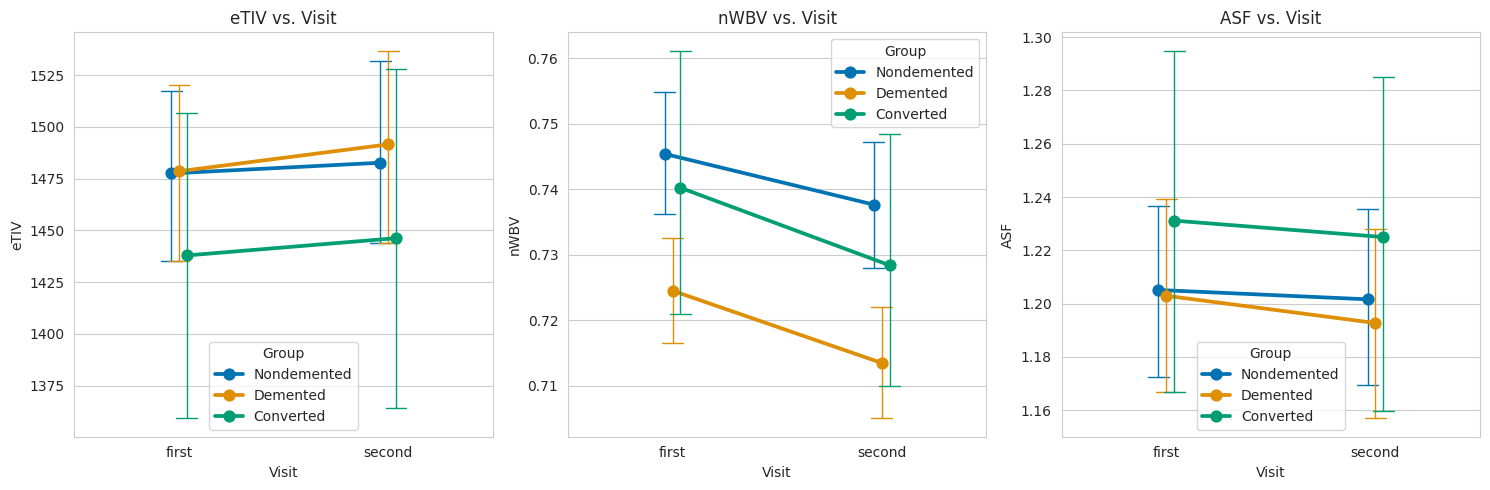

In [16]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot eTIV vs. Visit with Group as hue
sns.pointplot(data=df, x='Visit', y='eTIV', hue='Group', dodge=True,
              capsize=.1, errwidth=1, palette='colorblind', ax=axes[0])
axes[0].set_title('eTIV vs. Visit')

# Plot nWBV vs. Visit with Group as hue
sns.pointplot(data=df, x='Visit', y='nWBV', hue='Group', dodge=True,
              capsize=.1, errwidth=1, palette='colorblind', ax=axes[1])
axes[1].set_title('nWBV vs. Visit')

# Plot ASF vs. Visit with Group as hue
sns.pointplot(data=df, x='Visit', y='ASF', hue='Group', dodge=True,
              capsize=.1, errwidth=1, palette='colorblind', ax=axes[2])
axes[2].set_title('ASF vs. Visit')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

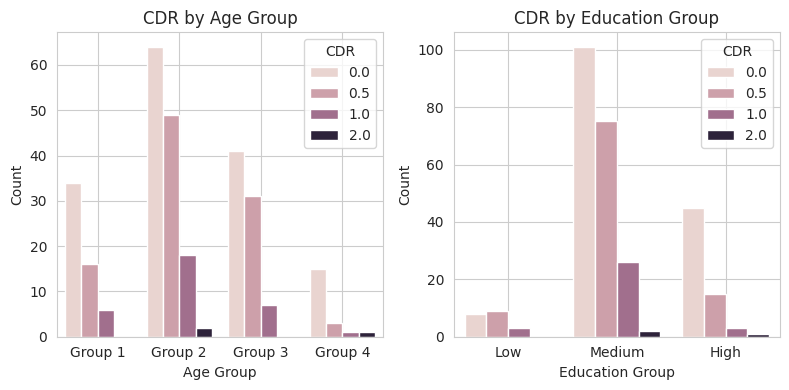

In [17]:
# Create age and education groups
df['Age_Group'] = pd.cut(df['Age'], bins=4, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4'])
df['Education_Group'] = pd.cut(df['EDUC'], bins=3, labels=['Low', 'Medium', 'High'])

# Create the figure and two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Bar plot for CDR by age group
sns.countplot(data=df, x='Age_Group', hue='CDR', ax=axes[0])
axes[0].set_title('CDR by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='CDR')
axes[0].grid(True)

# Bar plot for CDR by education group
sns.countplot(data=df, x='Education_Group', hue='CDR', ax=axes[1])
axes[1].set_title('CDR by Education Group')
axes[1].set_xlabel('Education Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='CDR')
axes[1].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


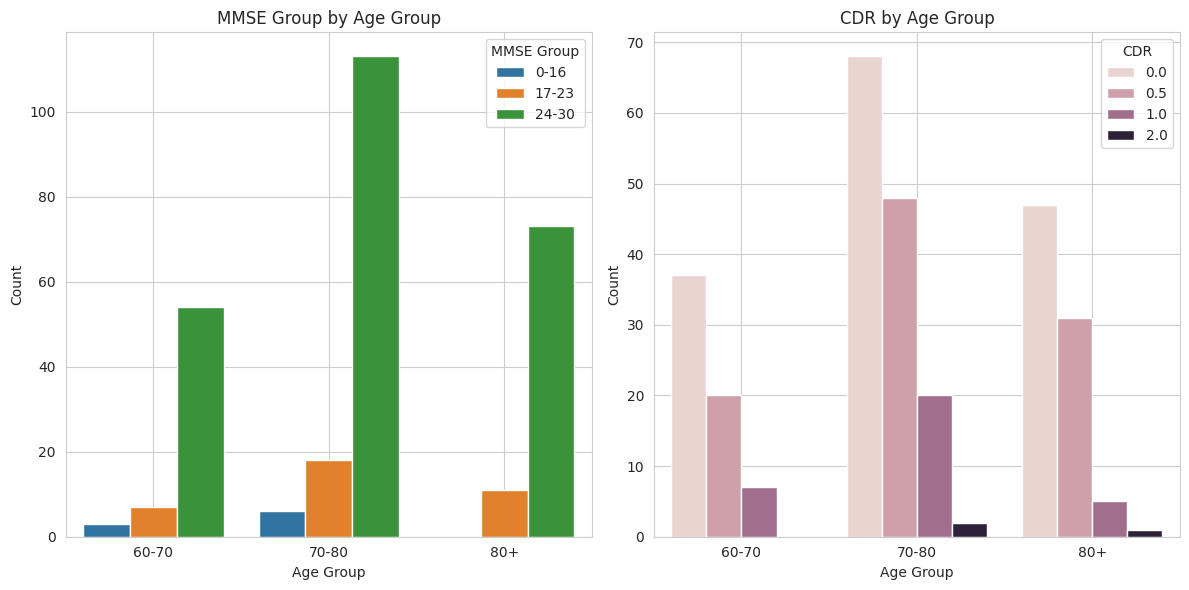

In [18]:
# Assuming you have a DataFrame named df containing Age, Education, and MMSE columns

# Create MMSE groups based on score ranges
df['MMSE_Group'] = pd.cut(df['MMSE'], bins=[0, 17, 23, 30], labels=['0-16', '17-23', '24-30'])

# Create age and education groups
df['Age_Group'] = pd.cut(df['Age'], bins=[60, 70, 80, float('inf')], labels=['60-70', '70-80', '80+'])

# Create the figure and two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar plot of MMSE group by age group
sns.countplot(data=df, x='Age_Group', hue='MMSE_Group', ax=axes[0])
axes[0].set_title('MMSE Group by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='MMSE Group')
axes[0].grid(True)

# Bar plot for CDR by age group
sns.countplot(data=df, x='Age_Group', hue='CDR', ax=axes[1])
axes[1].set_title('CDR by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='CDR')
axes[1].grid(True)



# Adjust layout and display the plots
plt.tight_layout()
plt.show()
